# Exercise 5 - kNN & SVM
Necessary libraries are being loaded.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 5.1 Extract from the data preparation
Explain with comments in the code what is performed here by the individual commands.

In [42]:
from sklearn import preprocessing

df = pd.read_csv('prepared_data.csv')

dfPrepared = df.copy()
dfPrepared.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70


## 5.2 One-Hot-Encoding & Normalization
Now carry out binary encoding for all relevant features and save the result in the dfTrans data frame.

Now all non-binary attributes must be normalized. This time minmax_scale should be used for this. Use comments to explain the function of the individual lines of code.

In [43]:
from sklearn.preprocessing import MinMaxScaler
# transform isHoliday is binear values
replacer_dict = {'Keine Ferien' : 0, 
                 'Ferien' : 1}
dfPrepared['isHoliday'] = dfPrepared['isHoliday'].replace(to_replace = replacer_dict)
dfPrepared['isHoliday'].unique()

scaler = MinMaxScaler()
# Transform weekday in numerical 
dfPrepared['weekday'] = dfPrepared['weekday'].replace (to_replace=['Mo','Di','Mi','Do','Fr','Sa','Sun'], value =[1,2,3,4,5,6,7])  

# binary encoding
try:
    dfPrepared = pd.get_dummies(dfPrepared, prefix='start_',prefix_sep='',columns=['startClusterName'])
    dfPrepared = pd.get_dummies(dfPrepared, prefix='end_',prefix_sep='',columns=['endClusterName'])
    dfPrepared =dfPrepared.replace({True : 1,False: 0})
except Exception as e:
    print(e)
dfPrepared['high_count'] = np.where(dfPrepared['count'] > 10, 1, 0)
dfPrepared
# dfPrepared['weekday'].unique()

/tmp/ipykernel_7605/811077811.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfPrepared['isHoliday'] = dfPrepared['isHoliday'].replace(to_replace = replacer_dict)
/tmp/ipykernel_7605/811077811.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfPrepared['weekday'] = dfPrepared['weekday'].replace (to_replace=['Mo','Di','Mi','Do','Fr','Sa','Sun'], value =[1,2,3,4,5,6,7])
/tmp/ipykernel_7605/811077811.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,weekday,daytime,isHoliday,distance,count,startClusterZip,startClusterID,endClusterZip,endClusterID,year,month,total,start_Bran,start_Hunedoara,start_Turda,end_Bran,end_Hunedoara,end_Turda,high_count
0,2,7,0,3,15,71171,3254026000002,71171,3254026000007,2021,3,45,0,1,0,0,1,0,1
1,3,17,0,0,10,80982,3241013050002,80982,3241013050008,2021,3,0,0,0,1,0,0,1,0
2,6,11,0,3,10,80982,3241013050007,80982,3241013030001,2021,3,30,0,0,1,0,0,1,0
3,5,13,0,0,15,91157,3254028001012,91157,3254028001004,2021,3,0,1,0,0,1,0,0,1
4,5,18,0,7,10,91157,3254028001003,80982,3241013070001,2021,3,70,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,7,17,0,5,5,80982,3241013050001,80982,3241013080001,2020,10,25,0,0,1,0,0,1,0
265482,1,9,1,0,15,91157,3254028001012,91157,3254028001003,2020,10,0,1,0,0,1,0,0,1
265483,2,9,0,2,10,91157,3254028001013,91157,3254028003001,2020,10,20,1,0,0,1,0,0,0
265484,1,18,0,5,5,71171,3254026000014,71171,3254026000003,2020,10,25,0,1,0,0,1,0,0


<Axes: >

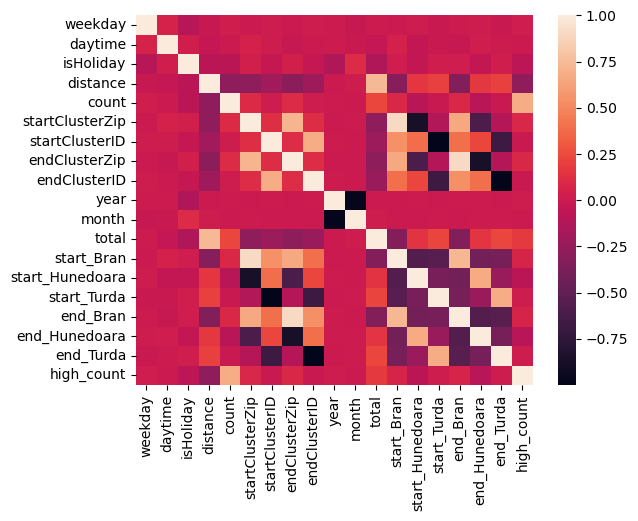

In [44]:
import seaborn as sns
sns.heatmap(dfPrepared.corr())

In [45]:
dfPrepared

,weekday,daytime,isHoliday,distance,count,startClusterZip,startClusterID,endClusterZip,endClusterID,year,month,total,start_Bran,start_Hunedoara,start_Turda,end_Bran,end_Hunedoara,end_Turda,high_count
0,2,7,0,3,15,71171,3254026000002,71171,3254026000007,2021,3,45,0,1,0,0,1,0,1
1,3,17,0,0,10,80982,3241013050002,80982,3241013050008,2021,3,0,0,0,1,0,0,1,0
2,6,11,0,3,10,80982,3241013050007,80982,3241013030001,2021,3,30,0,0,1,0,0,1,0
3,5,13,0,0,15,91157,3254028001012,91157,3254028001004,2021,3,0,1,0,0,1,0,0,1
4,5,18,0,7,10,91157,3254028001003,80982,3241013070001,2021,3,70,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,7,17,0,5,5,80982,3241013050001,80982,3241013080001,2020,10,25,0,0,1,0,0,1,0
265482,1,9,1,0,15,91157,3254028001012,91157,3254028001003,2020,10,0,1,0,0,1,0,0,1
265483,2,9,0,2,10,91157,3254028001013,91157,3254028003001,2020,10,20,1,0,0,1,0,0,0
265484,1,18,0,5,5,71171,3254026000014,71171,3254026000003,2020,10,25,0,1,0,0,1,0,0


Look at the correlations with the heat map. Remove characteristics that correlate 100% with others.

In [46]:
from sklearn.preprocessing import minmax_scale

scaled = minmax_scale(dfPrepared[['startClusterZip','endClusterZip','startClusterID','endClusterID','daytime','weekday', 'distance', 'count']], feature_range = (0, 1))

dfPrepared['startClusterZip'] = scaled[:,0] 
dfPrepared['endClusterZip'] = scaled[:,1]
dfPrepared['startClusterID'] = scaled[:,2]
dfPrepared['endClusterID'] = scaled[:,3]
dfPrepared['daytime'] = scaled[:,4]
dfPrepared['weekday'] = scaled[:,5]
dfPrepared['distance'] = scaled[:,6]
dfPrepared['count'] = scaled[:,7]


dfPrepared['high_count'].unique()

array([1, 0])

In [47]:
dfnorm = dfPrepared.drop(['startClusterZip','endClusterZip', 'startClusterID', 'endClusterID', 'total', 'count'], axis = 1)
dfnorm

,weekday,daytime,isHoliday,distance,year,month,start_Bran,start_Hunedoara,start_Turda,end_Bran,end_Hunedoara,end_Turda,high_count
0,0.166667,0.304348,0,0.214286,2021,3,0,1,0,0,1,0,1
1,0.333333,0.739130,0,0.000000,2021,3,0,0,1,0,0,1,0
2,0.833333,0.478261,0,0.214286,2021,3,0,0,1,0,0,1,0
3,0.666667,0.565217,0,0.000000,2021,3,1,0,0,1,0,0,1
4,0.666667,0.782609,0,0.500000,2021,3,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,1.000000,0.739130,0,0.357143,2020,10,0,0,1,0,0,1,0
265482,0.000000,0.391304,1,0.000000,2020,10,1,0,0,1,0,0,1
265483,0.166667,0.391304,0,0.142857,2020,10,1,0,0,1,0,0,0
265484,0.000000,0.782609,0,0.357143,2020,10,0,1,0,0,1,0,0


have a short look at our prepared dataframe. all numeric columns with a natural order are standardised and scaled. all columns without a natural order are one-hot encoded. Our target column ‘total’ is also binary. we want it that way because we perform a classification and either assign a data record to total (1) or not (0)

## 5.3 Training & evaluation of the models

In the following, the algorithms kNN and SVM are to be trained and tested. For this purpose, a data split of 70 % (training data) to 30 % (test data) must be carried out in advance.

In [51]:
from sklearn.model_selection import train_test_split

# we decide to reduced the dataset because we haved a lot of data, which caused the bug of the KNN algorithm

df_sampled = dfnorm.sample(frac=0.1, random_state=42)
df_sampled.to_csv('df_sample_data.csv', index=False)
x = df_sampled.drop(['high_count'], axis = 1)
y = df_sampled['high_count'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

### A1: k-Nearest Neighbors (kNN)
Train the kNN on the training data and evaluate on the test data. Test different values for k.

The following visualisation will help you to try out good ks. Here you can see again the change in the error rate with different k.

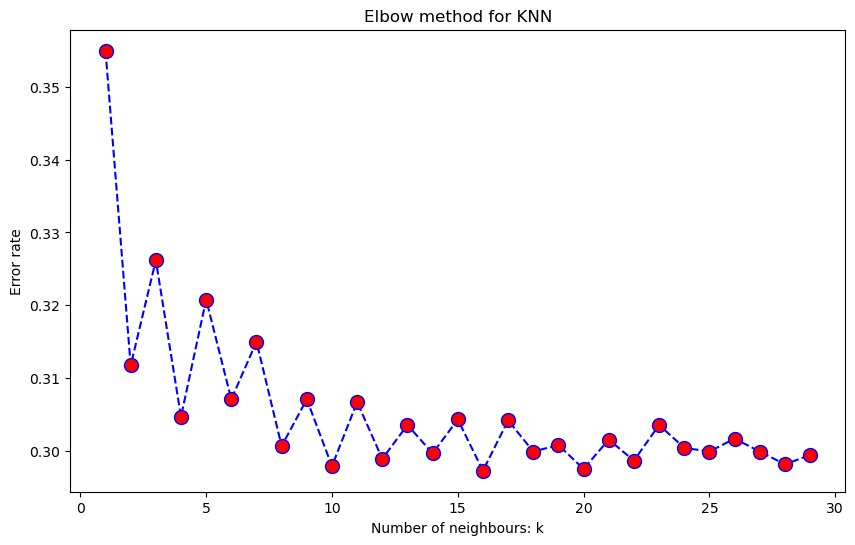

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rate = []

k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    error_rate.append(1 - accuracy_score(y_test, y_pred))  

plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Elbow method for KNN')
plt.xlabel('Number of neighbours: k')
plt.ylabel('Error rate')
plt.show()

In [53]:
# space
from sklearn.neighbors import KNeighborsClassifier 

knn_model = KNeighborsClassifier(n_neighbors = 23) 
knn_model.fit(x_train, y_train) 
y_pred = knn_model.predict(x_test)

Let's take a quick look at the distribution of the predicted classes

In [54]:
import numpy as np

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 6610 Datapoints (82.99%)
Class 1: 1355 Datapoints (17.01%)


This distribution also becomes apparent when we visualise the data points. Note: The n-dimensional space is reduced to 3 dimensions using PCA (theoretical Background not part of the class!) in order to make visualisation possible . PCA (Principal Component Analysis) does not simply select three existing features, but creates new features (the so-called principal components), which are linearly combined variables of the original features. The aim is to reduce the dimensions in such a way that the maximum possible variance is retained in the data.

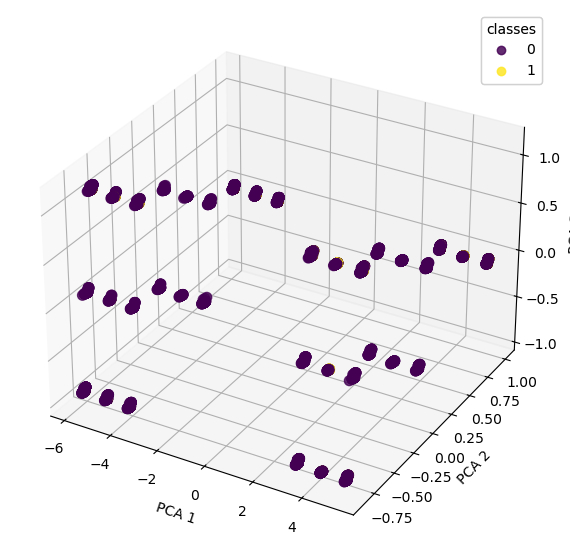

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Dimension reduction to 3 dimensions using PCA
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Visualisation of the test data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot with the test data and the prediction (y_pred) as colours
scatter = ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], x_test_pca[:, 2], 
                     c=y_pred, cmap='viridis', s=50, alpha=0.8)

# Add colour bars to display the classes
legend1 = ax.legend(*scatter.legend_elements(), title="classes")
ax.add_artist(legend1)

# Axis labelling
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

#### Model evaluation
Then use the scorer or other addressed methods to evaluate the Confusion Matrix and the accuracy of your models.

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      5482
           1       0.52      0.29      0.37      2483

    accuracy                           0.70      7965
   macro avg       0.63      0.58      0.59      7965
weighted avg       0.67      0.70      0.67      7965



In [57]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[4837  645]
 [1773  710]]


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')

Accuracy: 0.70
True Positive Rate (TPR): 0.29
False Positive Rate (FPR): 0.12


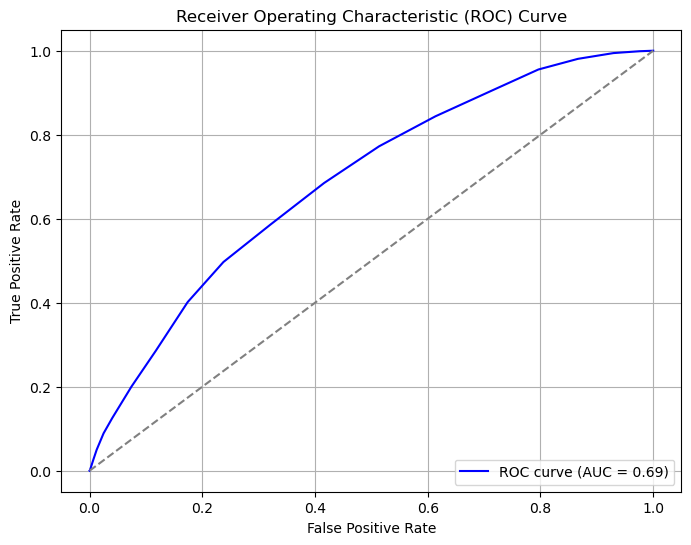

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = knn_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## A1.1 kNN with shepards method

### For comparison, look at the same algorithm but with Shepard's method

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=23, weights='distance')
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      5482
           1       0.48      0.34      0.40      2483

    accuracy                           0.68      7965
   macro avg       0.61      0.59      0.59      7965
weighted avg       0.66      0.68      0.66      7965



### A2: Support Vector Machine
Train an SVM on the training data and evaluate on the test data. Test with the parameter transfer (kernel = 'rbf', gamma = 'scale').

In [61]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', gamma = 'scale', random_state = 1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

#### Model evaluation
Then use the scorer or other addressed methods to evaluate the Confusion Matrix and the accuracy of your models.

In [62]:
import numpy as np

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 7965 Datapoints (100.00%)


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      5482
           1       1.00      0.00      0.00      2483

    accuracy                           0.69      7965
   macro avg       0.84      0.50      0.41      7965
weighted avg       0.79      0.69      0.56      7965



In [64]:
import numpy as np

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 7965 Datapoints (100.00%)


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')

Accuracy: 0.69
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00


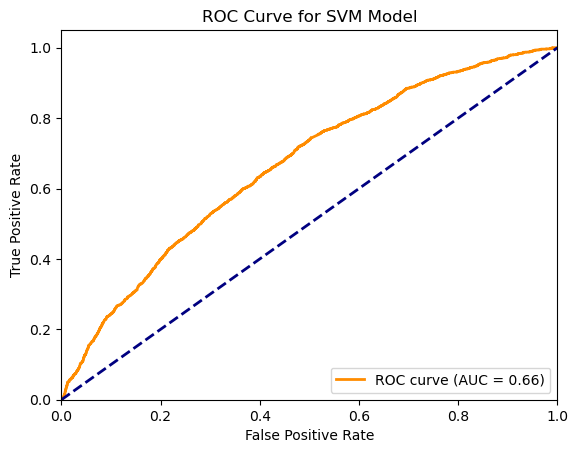

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

# Activate SVC model with probabilities
svm_model = SVC(kernel='rbf', gamma='scale', random_state=1, probability=True)
svm_model.fit(x_train, y_train)

# Predict probabilities (only for the positive class)
y_prob = svm_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC-Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

### Evaluation of the algorithms
Assess the quality of the two algorithms by evaluating the results. Which one would you use?

Ranking of the algorithms according to accuracy values
k-Nearest Neighbors with 70 %
support vector machine with 69 %


## 5.4 Optimization with GridSearch ( Preview)
Gridsearch is a method for hyperparameter optimization. Gridsearch iteratively tries out all combinations of the selected parameters. The combination with the highest score is then output.

For the sake of simplicity, cross-validation is not used in this exercise.

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### A1: SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 1)
param_grid1 = {"kernel": ["poly", "rbf", "sigmoid"], 
              "gamma": ["scale","auto"] }
gridSearch1 = GridSearchCV(estimator = svm_model, param_grid = param_grid1)
gridSearch1.fit(x_train, y_train)

results1 = pd.DataFrame(gridSearch1.cv_results_)

params1 = results1.loc[results1['rank_test_score'].idxmax()]
params1['params']

Now we want to train the model with the best parameters.

In [37]:
svm_model = SVC(kernel = 'linear', gamma = 'scale', random_state = 1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

Now look at the ConfusionMatrix again and compare.

In [38]:
print(confusion_matrix(y_test, y_pred))

[[2739    1]
 [1243    0]]


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')

Accuracy: 0.69
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00


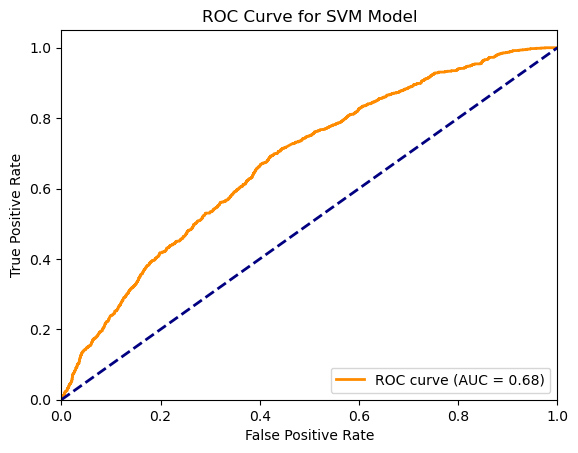

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

svm_model = SVC(kernel='sigmoid', gamma='scale', random_state=1, probability=True)
svm_model.fit(x_train, y_train)

y_prob = svm_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

### A1: k-Nearest Neighbours

Now convert GridSearch for k-Nearest Neighbors and select different values for metric and n_neighbors in param_grid.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 65, 2),  # Tester les valeurs impaires de 1 à 30
    'weights': ['uniform', 'distance'],  # Pondération uniforme ou basée sur la distance
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']  # Différents types de distances
}

# gridSearch = GridSearchCV(estimator = knn_model, param_grid = param_grid)
# Configurer GridSearchCV
gridSearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
gridSearch.fit(x_train, y_train)

# results = pd.DataFrame(gridSearch.cv_results_)

print("Meilleurs paramètres:", gridSearch.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 63, 'weights': 'uniform'}


In [69]:
from sklearn.neighbors import KNeighborsClassifier 

knn_model = gridSearch.best_estimator_
y_pred = knn_model.predict(x_test)

Now look at the ConfusionMatrix again and compare.

In [70]:
print("\n Classification report :\n", classification_report(y_test, y_pred))
print("\n confusion matrix:\n", confusion_matrix(y_test, y_pred))


 Classification report :
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      5482
           1       0.57      0.23      0.33      2483

    accuracy                           0.71      7965
   macro avg       0.65      0.58      0.57      7965
weighted avg       0.68      0.71      0.66      7965


 confusion matrix:
 [[5057  425]
 [1913  570]]


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')

Accuracy: 0.71
True Positive Rate (TPR): 0.23
False Positive Rate (FPR): 0.08


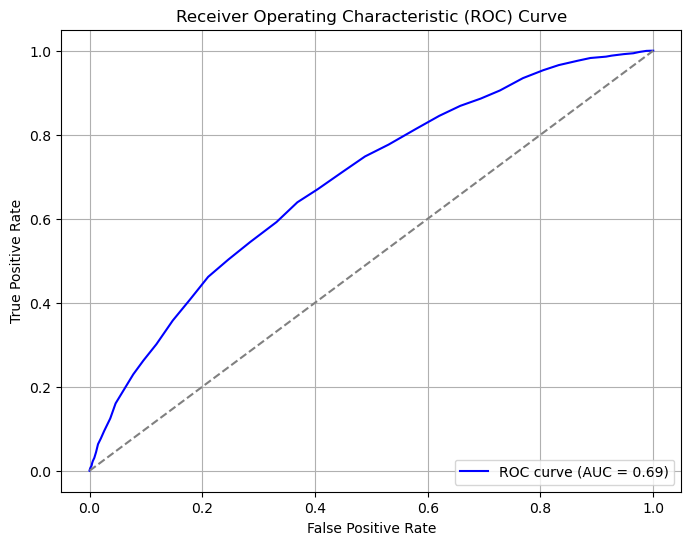

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

knn_model.fit(x_train, y_train)
y_proba = knn_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

although our true positive rate has improved, the ROC-curve has deteriorated. Why?

In [ ]:
# space